In [1]:
import pandas as pd
# Create a dataframe for the data in the csv file
recommendations = pd.read_csv('recommendations.csv')
recommendations.head()


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,23221,0
1,304390,4,0,2017-02-17,False,11.5,1283,1
2,1085660,2,0,2019-11-17,True,336.5,105979,2
3,703080,0,0,2022-09-23,True,27.4,108133,3
4,526870,0,0,2021-01-10,True,7.9,10612,4


In [2]:
#Remove column attributes 'helpful', 'funny', 'date', 'review_id'
recommendations = recommendations.drop(['helpful', 'funny', 'date', 'review_id'], axis=1)
recommendations.head()


,app_id,is_recommended,hours,user_id
0,975370,True,36.3,23221
1,304390,False,11.5,1283
2,1085660,True,336.5,105979
3,703080,True,27.4,108133
4,526870,True,7.9,10612


In [3]:
#Remove rows with missing values
recommendations = recommendations.dropna()
recommendations.head()


,app_id,is_recommended,hours,user_id
0,975370,True,36.3,23221
1,304390,False,11.5,1283
2,1085660,True,336.5,105979
3,703080,True,27.4,108133
4,526870,True,7.9,10612


In [4]:
import sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
recommendations['is_recommended'] = label_encoder.fit_transform(recommendations['is_recommended'])
display(recommendations.head())

,app_id,is_recommended,hours,user_id
0,975370,1,36.3,23221
1,304390,0,11.5,1283
2,1085660,1,336.5,105979
3,703080,1,27.4,108133
4,526870,1,7.9,10612


In [5]:
#Find correlation between attributes 'is_recommended' and 'hours' using pearson correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(recommendations['is_recommended'], recommendations['hours'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.053


In [6]:
#import scipy
import scipy.stats

# Computing the point biserial correlation coefficient
corr, pval = scipy.stats.pointbiserialr(recommendations['is_recommended'], recommendations['hours'])
print('Point Biserial correlation: %.3f' % corr, 'p-value: %.3f' % pval)

Point Biserial correlation: 0.053 p-value: 0.000


In [7]:
#Create the game dataframe
games = pd.read_csv('games.csv')
games.head()


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True


In [8]:
metadata = pd.read_json('games_metadata.json', lines=True)

In [9]:
metadatadf = pd.DataFrame(metadata)
metadatadf.head()

,app_id,description,tags
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,,[Action]
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."


In [10]:
games_metadf = pd.merge(games, metadatadf, on='app_id')
games_metadf.head()


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,,[Action]
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."


In [11]:
# These are the columns that we are interested in
relevant_cols = ['app_id', 'title', 'positive_ratio', 'user_reviews', 'tags']
gamesdf = games_metadf[relevant_cols]
# Sort by user reviews to keep the top 100 reviewed games
gamesdf = gamesdf.sort_values(by = 'user_reviews', ascending = False)
gamesdf = gamesdf.head(100)
review_avg = gamesdf['user_reviews'].mean()

Series Size  246
Average Common Genres  8.130081300813009


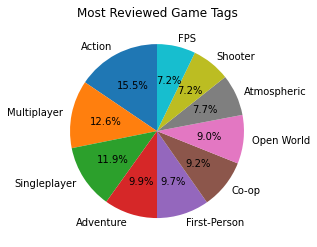

In [20]:
import numpy as np
from matplotlib import pyplot as plt

genres = gamesdf['tags']
count_list = []
for i in genres:
    for j in i:
        count_list.append(j)

sorted_genres = pd.value_counts(np.array(count_list))
sorted_genres = sorted_genres.sort_values(ascending=False)
print("Series Size ", sorted_genres.size)
print("Average Common Genres ", sorted_genres.mean())

# Create a chart to help us see our results
genre_slice = sorted_genres.head(10)
labels = genre_slice.keys()

fig, ax = plt.subplots()
title = 'Most Reviewed Game Tags'
title_text = plt.title(title)
title_text.set_color('black')

#Set different colors for each label font
pchart = plt.pie(genre_slice, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops={'fontsize': 10, 'color': 'black'})

Series Size  108
Average Common Genres  1.8518518518518519


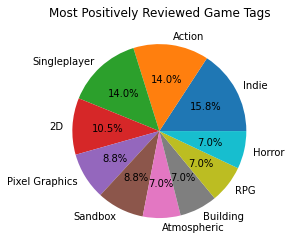

In [13]:
# Pick out the top 10 most positively reviewed games will help give a picture of games that are almost universally loved by players
gamesdf = gamesdf.sort_values('positive_ratio', ascending=False)
positivedf = gamesdf.head(10)
tags = positivedf['tags']
count_list = []
for i in tags:
    for j in i:
        count_list.append(j)

sorted_tags = pd.value_counts(np.array(count_list))
sorted_tags = sorted_tags.sort_values(ascending=False)
print("Series Size ", sorted_tags.size)
print("Average Common Genres ", sorted_tags.mean())  

# Create a chart to help us see our results
tag_slice = sorted_tags.head(10)
labels = tag_slice.keys()

fig, ax = plt.subplots()
title = 'Most Positively Reviewed Game Tags'
title_text = plt.title(title)
title_text.set_color('black')
pchart = ax.pie(tag_slice, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 10, 'color': 'black'})

In [14]:
#display the recommendations dataframe
display(recommendations.head())

,app_id,is_recommended,hours,user_id
0,975370,1,36.3,23221
1,304390,0,11.5,1283
2,1085660,1,336.5,105979
3,703080,1,27.4,108133
4,526870,1,7.9,10612


In [15]:
#dsiplay the users dataframe
users = pd.read_csv('users.csv')
users.head()


,user_id,products,reviews
0,6654146,156,1
1,4191643,329,4
2,2261155,176,2
3,2437528,98,2
4,2700117,144,3


In [21]:
#from the users table, filter values to only include users with more than 10 reviews
import pandas as pd
users = pd.read_csv('users.csv')
users = users[users['reviews'] > 10]
users.head()
#calculate row count
users.shape[0]

#merge users and recommendations tables on user_id
user_recommendations = pd.merge(users, recommendations, on='user_id')
display(user_recommendations)


,user_id,products,reviews,app_id,is_recommended,hours
0,2164089,702,35,264710,1,33.9
1,2164089,702,35,239030,1,10.3
2,2164089,702,35,250900,1,61.6
3,2164089,702,35,607080,1,19.0
4,2164089,702,35,335300,1,164.0
...,...,...,...,...,...,...
1651061,1468605,207,12,12210,1,20.9
1651062,1468605,207,12,438740,1,2.4
1651063,1468605,207,12,476600,1,16.4
1651064,1468605,207,12,1238840,1,34.1


In [24]:
#select user ids that have more than calue 30 in products column

user_recommendations = user_recommendations[user_recommendations['products'] > 30]
user_recommendations.head()

,user_id,products,reviews,app_id,is_recommended,hours
0,2164089,702,35,264710,1,33.9
1,2164089,702,35,239030,1,10.3
2,2164089,702,35,250900,1,61.6
3,2164089,702,35,607080,1,19.0
4,2164089,702,35,335300,1,164.0


<AxesSubplot:>

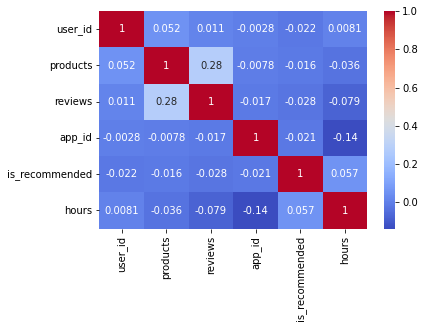

In [25]:
#use a correlation matrix to find the correlation between the attributes
import seaborn as sns
corr = user_recommendations.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [18]:
#select only 40k data points from the user_recommendations table

user_recommendations = user_recommendations.sample(n=40000)
user_recommendations.shape[0]



40000

In [ ]:
from sklearn.feature_selection import mutual_info_classif

#displaying the user_recommendations table
display(user_recommendations)

#selecting independent columns like user_id, app_id, hours
X = user_recommendations.iloc[:,0:4]  #independent columns

#selecting target column i.e is_recommended column
y = user_recommendations.iloc[:,-2].astype(int)    #target column i.e is_recommended

# Compute mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame for visualization
df_mi = pd.DataFrame(mutual_info, index=X.columns, columns=['mutual_info'])

# Sort the DataFrame by mutual_info in descending order
df_mi.sort_values('mutual_info', ascending=False, inplace=True)

print(df_mi)



,user_id,app_id,is_recommended,hours
246023,2998582,546560,1,29.2
1142923,5640940,435150,1,256.1
780766,5934165,1245620,1,59.6
1367149,4163250,1465360,1,83.5
1536987,6510954,238960,1,0.3
...,...,...,...,...
1438835,1709276,823500,1,18.9
887275,5685804,1142710,1,247.5
1587629,526811,397460,1,7.8
882101,2921483,1229490,1,6.5


                mutual_info
is_recommended     0.495341
app_id             0.045460
hours              0.034135
user_id            0.012907


In [27]:
#Gather relevant statistics for the dataframe 'user_recommendations'

user_recommendations.describe()

#display the user_recommendations table

display(user_recommendations)

#gathering insights from the user_recommendations table

user_recommendations.info()




,user_id,products,reviews,app_id,is_recommended,hours
0,2164089,702,35,264710,1,33.9
1,2164089,702,35,239030,1,10.3
2,2164089,702,35,250900,1,61.6
3,2164089,702,35,607080,1,19.0
4,2164089,702,35,335300,1,164.0
...,...,...,...,...,...,...
1651061,1468605,207,12,12210,1,20.9
1651062,1468605,207,12,438740,1,2.4
1651063,1468605,207,12,476600,1,16.4
1651064,1468605,207,12,1238840,1,34.1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646103 entries, 0 to 1651065
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1646103 non-null  int64  
 1   products        1646103 non-null  int64  
 2   reviews         1646103 non-null  int64  
 3   app_id          1646103 non-null  int64  
 4   is_recommended  1646103 non-null  int64  
 5   hours           1646103 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 87.9 MB


In [ ]:
#give 